In [18]:
import os
import matplotlib.pyplot as plt

In [5]:
# print hostname, working directory, and user
print(os.uname())
print(os.getcwd())
print(os.getlogin())

posix.uname_result(sysname='Linux', nodename='vmrosendahl', release='6.1.0-21-amd64', version='#1 SMP PREEMPT_DYNAMIC Debian 6.1.90-1 (2024-05-03)', machine='x86_64')
/home/rosendahl/sync/dataset/jupyter
rosendahl


In [8]:
dir = '/home/rosendahl/remote_interpreter/dataset/jupyter/data/sequences_export_benign_filetypes_more/'

In [22]:
event_types = {}
user_types = {}
fo_types = {}
path_types = {}
net_addr_types = {}
net_port_types = {}

In [23]:
# for file in dir
for file in os.listdir(dir):
    # open file
    with open(dir + file, 'r') as f:
        for line in f:
            if line.count(',') == 13:
                event, user, fo1_type, fo2_type, path1, path2, net1_localaddr, net1_localport, net1_remoteaddr, net1_remoteport, net2_localaddr, net2_localport, net2_remoteaddr, net2_remoteport = line.split(',')
            else:
                continue
            
            event_types[event] = event_types.get(event, 0) + 1
            user_types[user] = user_types.get(user, 0) + 1
            fo_types[fo1_type] = fo_types.get(fo1_type, 0) + 1
            fo_types[fo2_type] = fo_types.get(fo2_type, 0) + 1
            path_types[path1] = path_types.get(path1, 0) + 1
            path_types[path2] = path_types.get(path2, 0) + 1
            net_addr_types[net1_localaddr] = net_addr_types.get(net1_localaddr, 0) + 1
            net_addr_types[net1_remoteaddr] = net_addr_types.get(net1_remoteaddr, 0) + 1
            net_addr_types[net2_localaddr] = net_addr_types.get(net2_localaddr, 0) + 1
            net_addr_types[net2_remoteaddr] = net_addr_types.get(net2_remoteaddr, 0) + 1
            net_port_types[net1_localport] = net_port_types.get(net1_localport, 0) + 1
            net_port_types[net1_remoteport] = net_port_types.get(net1_remoteport, 0) + 1
            net_port_types[net2_localport] = net_port_types.get(net2_localport, 0) + 1
            net_port_types[net2_remoteport] = net_port_types.get(net2_remoteport, 0) + 1


In [24]:
print(f'{len(event_types)=}')
print(f'{len(user_types)=}')
print(f'{len(fo_types)=}')
print(f'{len(path_types)=}')
print(f'{len(net_addr_types)=}')
print(f'{len(net_port_types)=}')

len(event_types)=29
len(user_types)=17
len(fo_types)=7
len(path_types)=242704
len(net_addr_types)=547
len(net_port_types)=15623


In [26]:
# find only absolute paths in path_types
abs_path_types = {}
for path in path_types:
    if path.startswith('/'):
        abs_path_types[path] = path_types[path]

print(f'{len(abs_path_types)=}')
print(f'abs path percentage: {len(abs_path_types) / len(path_types) * 100:.2f}%')

len(abs_path_types)=239868
abs path percentage: 98.83%


In [30]:
top_directories = {}
for path in abs_path_types:
    top_dir = path.split('/')[1]
    top_directories[top_dir] = top_directories.get(top_dir, 0) + 1
    
print(f'{len(top_directories)=}')

len(top_directories)=21


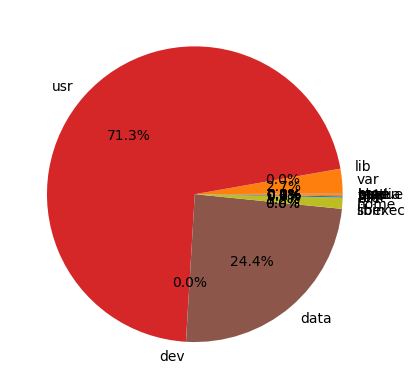

In [31]:
# pie plot top directories
fig, ax = plt.subplots()
ax.pie(top_directories.values(), labels=top_directories.keys(), autopct='%1.1f%%')
plt.show()

In [33]:
# top lvl 2 directories
lvl2_directories = {}
for path in abs_path_types:
    lvl2_dir = path.split('/')[2] if len(path.split('/')) > 2 else None
    lvl2_directories[lvl2_dir] = lvl2_directories.get(lvl2_dir, 0) + 1
    
print(f'{len(lvl2_directories)=}')

len(lvl2_directories)=702


In [34]:
print(lvl2_directories)

{'libmap.conf': 1, 'run': 42, 'libdevstat.so.7': 1, 'libkvm.so.7': 1, 'lib': 99, 'libxo.so.0': 1, 'libutil.so.9': 1, 'libc.so.7': 1, 'libelf.so.2': 1, 'hpet0': 1, 'share': 1134, 'gather_stats_uma.txt': 1, 'dmesg': 1, 'ld-elf.so.1': 1, 'local': 67035, 'null': 1, 'mem': 1, 'kmem': 1, 'nsswitch.conf': 1, 'pwd.db': 1, 'darpa': 7, 'resolv.conf': 1, 'hosts': 1, 'services': 1, 'sleep': 1, 'date': 1, 'home': 3043, 'bin': 51, 'db': 62, 'mv': 1, 'libncursesw.so.8': 1, 'libm.so.5': 1, 'libjail.so.1': 1, 'libncurses.so.8': 1, 'tty': 1, 'profile': 1, 'user': 713, 'unlink': 1, 'libcrypto.so.8': 1, 'libcrypt.so.5': 1, 'spwd.db': 1, 'pam.d': 7, 'login.conf': 1, 'group': 1, 'bob': 483, 'random': 1, 'pts': 8, 'motd': 1, 'dd': 1, 'mail': 3411, 'hosts.allow': 1, 'libthr.so.3': 1, 'libcxxrt.so.1': 1, 'libgcc_s.so.1': 1, 'spool': 2581, 'aliases.db': 1, 'libedit.so.7': 1, 'dhclient-script': 1, 'resolvconf': 3, 'libexec': 79, 'defaults': 6, 'rc.conf': 1, 'rc.conf.local': 1, 'cp': 1, None: 20, 'sh': 1, 'irene'

In [56]:
# get all file endings
file_endings = {}
is_dir_count = 0
for path in abs_path_types:
    file_ending = path.split('.')[-1]
    if file_ending in [ '..', '.', '']:
        is_dir_count += 1
        file_ending = 'dir'
    if file_ending == path:
        file_ending = 'no_extension'
    if file_ending == '':
        file_ending = 'no_extension'
    file_endings[file_ending] = file_endings.get(file_ending, 0) + 1

print(f'{len(file_endings)=}')
print(f'{is_dir_count=}')

len(file_endings)=14231
is_dir_count=88091


In [57]:
# print top 25 file endings and their percentage of total
sorted_file_endings = sorted(file_endings.items(), key=lambda x: x[1], reverse=True)
for i in range(25):
    print(f'{sorted_file_endings[i][0]}: {sorted_file_endings[i][1]} ({sorted_file_endings[i][1] / sum(file_endings.values()) * 100:.2f}%)')


dir: 88350 (36.83%)
no_extension: 59151 (24.66%)
hpp: 6834 (2.85%)
ta1-cadets: 5516 (2.30%)
gz: 4921 (2.05%)
ri: 4419 (1.84%)
pyc: 3754 (1.57%)
html: 3493 (1.46%)
py: 3361 (1.40%)
h: 3036 (1.27%)
png: 2404 (1.00%)
pyo: 2307 (0.96%)
UTF-8: 2208 (0.92%)
mo: 1279 (0.53%)
ISO8859-1: 1176 (0.49%)
ISO8859-15: 1036 (0.43%)
elc: 910 (0.38%)
rb: 826 (0.34%)
tmp: 599 (0.25%)
pm: 577 (0.24%)
cmake: 576 (0.24%)
svg: 549 (0.23%)
so: 448 (0.19%)
gif: 442 (0.18%)
xml: 424 (0.18%)


In [42]:
# get all privileged ports
priv_ports = set()
for port in net_port_types:
    port = port.strip('\n')
    if not port.isdigit():
        continue
    if 0 <= int(port) < 1024:
        priv_ports.add(int(port))
        
priv_ports = sorted(list(priv_ports))

print(f'{len(priv_ports)=}')
print(priv_ports)

len(priv_ports)=8
[1, 22, 25, 53, 67, 80, 143, 512]


1: TCP Port Service Multiplexer  
22: ssh  
25: smtp  
53: dns  
67: bootps  
80: http  
143: imap  
512: remote process execution  

In [43]:
# get percentage of privileged ports
priv_port_count = 0
for port in net_port_types:
    port = port.strip('\n')
    if not port.isdigit():
        continue
    if 0 <= int(port) < 1024:
        priv_port_count += net_port_types[port]

print(f'{priv_port_count=}')
print(f'priv port percentage: {priv_port_count / sum(net_port_types.values()) * 100:.2f}%')

priv_port_count=335895
priv port percentage: 0.47%


In [58]:
# check if there are any lines where both net1 and net2 are present
both_net_count = 0

for file in os.listdir(dir):
    with open(dir + file, 'r') as f:
        for line in f:
            if line.count(',') == 13:
                event, user, fo1_type, fo2_type, path1, path2, net1_localaddr, net1_localport, net1_remoteaddr, net1_remoteport, net2_localaddr, net2_localport, net2_remoteaddr, net2_remoteport = line.split(',')
            else:
                continue
            
            if net1_localaddr != 'None' and net2_localaddr != 'None':
                both_net_count += 1

print(f'{both_net_count=}')

both_net_count=7309
